In [28]:
import requests
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
import numpy as np
from datetime import datetime

In [30]:
API_KEY = "082c2c76eed79af068852d8bf80000f1"

Test Data

In [26]:
current_url = f"http://api.openweathermap.org/data/2.5/weather?q=Colombo&appid={API_KEY}&units=metric"
current_data = requests.get(current_url).json()
current_data

{'coord': {'lon': 79.8478, 'lat': 6.9319},
 'weather': [{'id': 804,
   'main': 'Clouds',
   'description': 'overcast clouds',
   'icon': '04n'}],
 'base': 'stations',
 'main': {'temp': 24.76,
  'feels_like': 25.59,
  'temp_min': 24.76,
  'temp_max': 24.76,
  'pressure': 1011,
  'humidity': 88,
  'sea_level': 1011,
  'grnd_level': 1010},
 'visibility': 10000,
 'wind': {'speed': 4.24, 'deg': 233, 'gust': 5.56},
 'clouds': {'all': 96},
 'dt': 1754871833,
 'sys': {'country': 'LK', 'sunrise': 1754872489, 'sunset': 1754917020},
 'timezone': 19800,
 'id': 1248991,
 'name': 'Colombo',
 'cod': 200}

In [38]:
forecast_url = f"http://api.openweathermap.org/data/2.5/forecast?q=London&appid={API_KEY}&units=metric"
forecast_data = requests.get(forecast_url).json()
forecast_data

{'cod': '200',
 'message': 0,
 'cnt': 40,
 'list': [{'dt': 1754881200,
   'main': {'temp': 16,
    'feels_like': 15.51,
    'temp_min': 15.43,
    'temp_max': 16,
    'pressure': 1025,
    'sea_level': 1025,
    'grnd_level': 1020,
    'humidity': 71,
    'temp_kf': 0.57},
   'weather': [{'id': 803,
     'main': 'Clouds',
     'description': 'broken clouds',
     'icon': '04n'}],
   'clouds': {'all': 54},
   'wind': {'speed': 1.07, 'deg': 140, 'gust': 1.52},
   'visibility': 10000,
   'pop': 0,
   'sys': {'pod': 'n'},
   'dt_txt': '2025-08-11 03:00:00'},
  {'dt': 1754892000,
   'main': {'temp': 16.16,
    'feels_like': 15.48,
    'temp_min': 16.1,
    'temp_max': 16.16,
    'pressure': 1024,
    'sea_level': 1024,
    'grnd_level': 1020,
    'humidity': 63,
    'temp_kf': 0.06},
   'weather': [{'id': 803,
     'main': 'Clouds',
     'description': 'broken clouds',
     'icon': '04d'}],
   'clouds': {'all': 64},
   'wind': {'speed': 1.33, 'deg': 87, 'gust': 2.5},
   'visibility': 10000,

In [40]:
print("\nCurrent Weather:")
print(f"Temperature: {current_data['main']['temp']}°C")
print(f"Humidity: {current_data['main']['humidity']}%")
print(f"Weather: {current_data['weather'][0]['description']}")


Current Weather:
Temperature: 24.76°C
Humidity: 88%
Weather: overcast clouds


In [42]:
forecast_list = forecast_data['list']
temps = []
dates = []

In [44]:
for item in forecast_list[:8]:  # First 8 readings (24 hours)
    temps.append(item['main']['temp'])
    dates.append(datetime.strptime(item['dt_txt'], '%Y-%m-%d %H:%M:%S'))

In [46]:
df = pd.DataFrame({'datetime': dates, 'temperature': temps})
df

,datetime,temperature
0,2025-08-11 03:00:00,16.00
1,2025-08-11 06:00:00,16.16
2,2025-08-11 09:00:00,24.90
3,2025-08-11 12:00:00,28.44
4,2025-08-11 15:00:00,29.92
5,2025-08-11 18:00:00,27.00
6,2025-08-11 21:00:00,23.48
7,2025-08-12 00:00:00,21.87


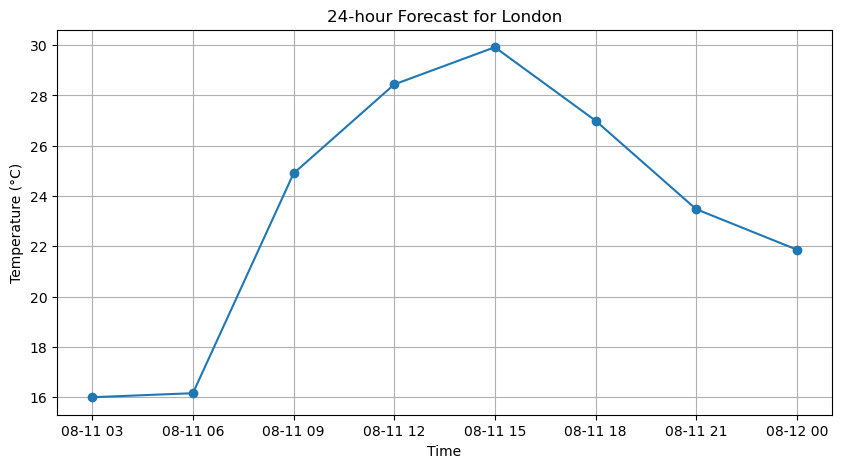

In [50]:
plt.figure(figsize=(10, 5))
plt.plot(df['datetime'], df['temperature'], marker='o')
plt.title(f"24-hour Forecast for London")
plt.xlabel("Time")
plt.ylabel("Temperature (°C)")
plt.grid()
plt.show()

Test Prediction Model

In [53]:
print("\nTesting temperature prediction...")
X = np.arange(len(temps)).reshape(-1, 1)
y = np.array(temps)


Testing temperature prediction...


In [55]:
model = LinearRegression()
model.fit(X,y)

LinearRegression()

In [57]:
#Next 3 steps
future_X = np.arange(len(temps), len(temps)+3).reshape(-1, 1)
future_y = model.predict(future_X)
print(f"Next predicted temperatures: {future_y.round(1)}°C")

Next predicted temperatures: [28.1 29.1 30.1]°C
